<a href="https://colab.research.google.com/github/HusseinIssaOp/SeniorProjectISD/blob/main/Amzn_Pytorch_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
la = list(uploaded.keys())[0]


Saving AMZN.csv to AMZN.csv


In [40]:
data = pd.read_csv(la)
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6644,2023-10-10,128.820007,130.740005,128.050003,129.479996,129.479996,42178600
6645,2023-10-11,129.740005,132.050003,129.610001,131.830002,131.830002,40741800
6646,2023-10-12,132.169998,134.479996,131.229996,132.330002,132.330002,55528600
6647,2023-10-13,132.979996,133.309998,128.949997,129.789993,129.789993,45786600


In [41]:
data = data[['Date', 'Close']]
data

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6644,2023-10-10,129.479996
6645,2023-10-11,131.830002
6646,2023-10-12,132.330002
6647,2023-10-13,129.789993


In [42]:
import torch

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


<ipython-input-43-5d372472b362>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


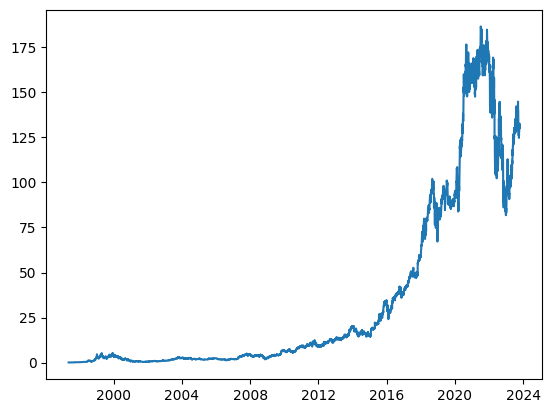

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn



#converted it to date format
data['Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Close'])

In [44]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)  #deep copy library

    df.set_index('Date', inplace=True)   #took a loop at the days index

    for i in range(1, n_steps+1):
      #created a new column and adds to it the 7 above
        df[f'Close(t-{i})'] = df['Close'].shift(i) #shift function for loooooopbacks

    df.dropna(inplace=True)

    return df

lookback = 7 # week b4 each clase price
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df.tail(10)

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
2023-10-03,124.720001,129.460007,127.120003,125.980003,125.980003,125.980003,131.270004,129.119995
2023-10-04,127.000000,124.720001,129.460007,127.120003,125.980003,125.980003,125.980003,131.270004
2023-10-05,125.959999,127.000000,124.720001,129.460007,127.120003,125.980003,125.980003,125.980003
2023-10-06,127.959999,125.959999,127.000000,124.720001,129.460007,127.120003,125.980003,125.980003
2023-10-09,128.259995,127.959999,125.959999,127.000000,124.720001,129.460007,127.120003,125.980003
2023-10-10,129.479996,128.259995,127.959999,125.959999,127.000000,124.720001,129.460007,127.120003
2023-10-11,131.830002,129.479996,128.259995,127.959999,125.959999,127.000000,124.720001,129.460007
2023-10-12,132.330002,131.830002,129.479996,128.259995,127.959999,125.959999,127.000000,124.720001
2023-10-13,129.789993,132.330002,131.830002,129.479996,128.259995,127.959999,125.959999,127.000000


In [45]:
shifted_df_as_np = shifted_df.to_numpy()
        #converttt to nump
shifted_df_as_np

array([[7.91670000e-02, 7.50000000e-02, 6.97920000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [7.65630000e-02, 7.91670000e-02, 7.50000000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [7.52600000e-02, 7.65630000e-02, 7.91670000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.32330002e+02, 1.31830002e+02, 1.29479996e+02, ...,
        1.25959999e+02, 1.27000000e+02, 1.24720001e+02],
       [1.29789993e+02, 1.32330002e+02, 1.31830002e+02, ...,
        1.27959999e+02, 1.25959999e+02, 1.27000000e+02],
       [1.32550003e+02, 1.29789993e+02, 1.32330002e+02, ...,
        1.28259995e+02, 1.27959999e+02, 1.25959999e+02]])

In [11]:
shifted_df_as_np.shape

(6642, 8)

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

    #here i did the scaler btw -1 and 1 not 0 try

shifted_df_as_np

array([[-0.99991063, -0.99995531, -1.        , ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99993855, -0.99991063, -0.99994415, ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99995253, -0.99993855, -0.99989946, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.41833145,  0.41296951,  0.38777175, ...,  0.35002393,
         0.36117672,  0.33672642],
       [ 0.3910927 ,  0.41833145,  0.41297279, ...,  0.37147157,
         0.35002393,  0.36117672],
       [ 0.42069072,  0.3910927 ,  0.4183347 , ...,  0.37468868,
         0.37147157,  0.35002393]])

In [47]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((6642, 7), (6642,))

In [48]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99969839, -0.99982128, -0.99983244, ..., -0.99998325,
        -1.        , -0.99995531],
       [-0.99982128, -0.99983244, -0.99987154, ..., -1.        ,
        -0.99994415, -0.99991063],
       [-0.99983244, -0.99987154, -0.99998325, ..., -0.99994415,
        -0.99989946, -0.99993855],
       ...,
       [ 0.33672642,  0.36117672,  0.35002393, ...,  0.37468868,
         0.38777175,  0.41296951],
       [ 0.36117672,  0.35002393,  0.37147157, ...,  0.38777175,
         0.41297279,  0.41833145],
       [ 0.35002393,  0.37147157,  0.37468868, ...,  0.41297279,
         0.4183347 ,  0.3910927 ]])

In [49]:
split_index = int(len(X) * 0.95) # 95 is the trainig part so tesing is 5%

split_index

6309

In [50]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6309, 7), (333, 7), (6309,), (333,))

In [51]:
  #input loopback sequence

X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape # 3d dimension for the lstm

((6309, 7, 1), (333, 7, 1), (6309, 1), (333, 1))

In [52]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float() # to pytorch tensor ...
y_test = torch.tensor(y_test).float()
#JUST  pytorch size !!
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6309, 7, 1]),
 torch.Size([333, 7, 1]),
 torch.Size([6309, 1]),
 torch.Size([333, 1]))

In [53]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y  # store in self

    def __len__(self):
        return len(self.X) # return length,,

    def __getitem__(self, i):
        return self.X[i], self.y[i] # the indexes

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [54]:
train_dataset # so i created one dataset for training and other for testing

In [55]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [56]:
  #new   loop for getting the batches up

for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break   # so 16 batches 7 columns loopback with 1 value each

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [57]:
class LSTM(nn.Module): #with the pytorch module
    def __init__(self, input_size, hidden_size, num_stacked_layers): #stacked more complex
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,  #avoid overfit ==1
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)


      # more study?
        #INITIALIZE the lstm useing these 2 gates !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0)) # passed x to them
        out = self.fc(out[:, -1, :])
        return out



model = LSTM(1, 4, 1) # 1 instance, 4 hidden size  with a one stack
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [58]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch) #x in model
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
            #so each 100 batch we print
    print()

In [59]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches)) #avg loss for all batches we did
    print('***************************************************')
    print()

In [60]:
learning_rate = 0.001

        #tried 10 b4 the 6 and the lass was getting down each time and its now on 0.002
        #at first epoch it was 0.34
num_epochs = 6
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.362
Batch 200, Loss: 0.167
Batch 300, Loss: 0.072

Val Loss: 0.016
***************************************************

Epoch: 2
Batch 100, Loss: 0.014
Batch 200, Loss: 0.008
Batch 300, Loss: 0.006

Val Loss: 0.011
***************************************************

Epoch: 3
Batch 100, Loss: 0.003
Batch 200, Loss: 0.002
Batch 300, Loss: 0.002

Val Loss: 0.007
***************************************************

Epoch: 4
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Batch 300, Loss: 0.001

Val Loss: 0.004
***************************************************

Epoch: 5
Batch 100, Loss: 0.001
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.002
***************************************************

Epoch: 6
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.002
***************************************************



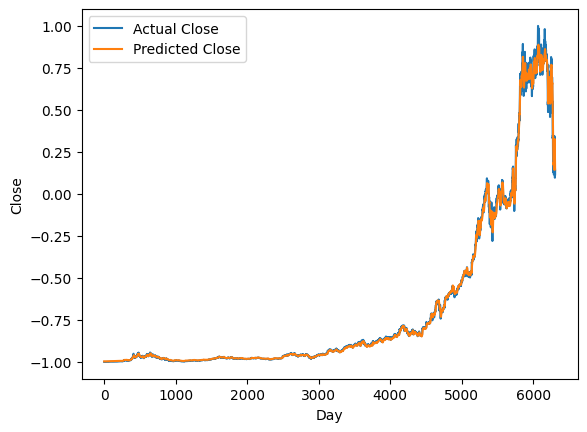

In [61]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()
  #plot for training the 80
plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [62]:
train_predictions = predicted.flatten()
#inverse the scaler ez
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions #for the x train
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([  0.38613421,   0.38433337,   0.38285491, ..., 111.24044377,
       109.05386704, 106.91097159])

In [63]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten() #for the y train
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([7.91646265e-02, 7.65634249e-02, 7.52572660e-02, ...,
       1.07669999e+02, 1.03660004e+02, 1.06220001e+02])

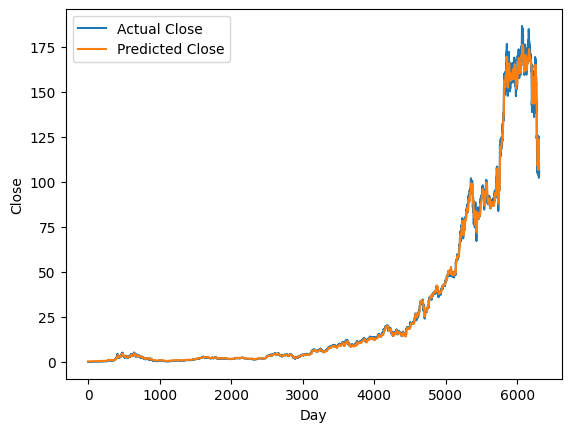

In [64]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show() #train


In [65]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions # for the x test
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([105.7398695 , 105.72965367, 106.28607459, 107.87546435,
       110.25858188, 111.41974327, 111.16117382, 110.74946141,
       109.7210558 , 109.47104864, 110.09335833, 110.81913249,
       112.11271894, 113.41724933, 113.53178557, 112.96300061,
       112.35687061, 111.75602639, 111.88948526, 112.12973791,
       113.36513637, 115.78904218, 118.57814864, 120.47271826,
       121.54296266, 120.79914683, 120.85226026, 121.2969101 ,
       124.03018383, 127.28490954, 130.01077984, 133.09179754,
       136.69392262, 139.23331234, 140.74591663, 140.9082027 ,
       141.50655689, 142.15276095, 142.67214532, 143.2228386 ,
       143.97932138, 144.43153027, 144.58253336, 143.86706953,
       142.1409944 , 140.04668251, 138.36969673, 137.56847661,
       136.4247316 , 134.79485092, 133.36864209, 131.98223499,
       130.8393626 , 129.96379147, 128.89200748, 128.8797018 ,
       129.28953556, 130.37767711, 132.2233686 , 132.29505171,
       131.79026853, 131.03239622, 129.50459046, 128.18

In [66]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten() # for the y test
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([108.67999989, 108.94999683, 112.44000207, 116.45999935,
       113.22000127, 107.40000166, 108.91999825, 106.20999917,
       109.55999806, 113.50000006, 114.33000152, 116.3300018 ,
       115.54000075, 111.74999999, 109.22000073, 110.40000137,
       110.62999651, 113.55000232, 113.76000211, 118.20999802,
       122.76999614, 124.62999702, 122.41999835, 121.13999873,
       114.80999825, 120.97000076, 122.28000035, 134.94999758,
       135.38999806, 134.16000488, 139.5200031 , 142.57000925,
       140.80000272, 139.41000507, 137.83000298, 142.69000357,
       140.64000103, 143.55000084, 143.17999102, 144.7799968 ,
       142.10000324, 142.30000119, 138.22999608, 133.22000121,
       133.61999431, 133.80000247, 137.27999891, 130.7499991 ,
       129.78999174, 128.72999653, 126.76999668, 127.82000117,
       127.51000241, 126.11000014, 129.47999576, 129.82000839,
       133.27000486, 136.44999605, 126.82000034, 128.55000227,
       126.27999811, 123.52999999, 124.66000532, 122.19

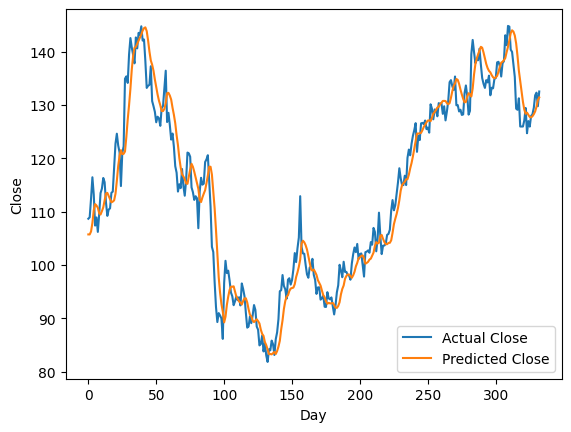

In [67]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show() #test


In [68]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(new_y_test, test_predictions)
mae = mean_absolute_error(new_y_test, test_predictions)
mse = mean_squared_error(new_y_test, test_predictions)
rmse = mean_squared_error(new_y_test, test_predictions, squared=False)

print(r2)
print(mae)
print(mse)
print(rmse)


0.9351374127583896
3.3180250141223224
18.87623780727453
4.34467925251963


In [ ]:
new_data_features = [129.789993	,132.330002,	131.830002,	129.479996,	128.259995,	127.959999,	125.959999]

new_data_array = np.array(new_data_features)

model.eval()

new_data = preprocess_new_data(new_data_array)

new_data_tensor = torch.tensor(new_data, dtype=torch.float32)

new_data_tensor = new_data_tensor.view(1, lookback, -1)

with torch.no_grad():
    predicted = model(new_data_tensor)

predicted_close_price = predicted.numpy()[0][0]


#inerse the min max
predicted_close_price_inverse = predicted_close_price * (185.966995 - 0.069792)

print(f"Predicted Close Price for the Next Day: {predicted_close_price_inverse}")


Predicted Close Price for the Next Day: 132.51581921245122
